# A/B Testing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')
sns.set()

An **A/B testing** is: 
- an experiment designed to test which online version is better
- based on metric(s) like signup rate, average sales per user, etc.
- using random assignment and analyzing the results

# When to A/B test and when not to

A/B testing is ok for: 
- optimizing conversion rates
- releasing new app features
- evaluating incremental effects on ads
- assessing the impact of drug trials
- ...

But we should not A/B test if:
- There is no sufficient sample size
- no clear hypothesis to be tested
- ethical considerations
- high opportunity cost

# A/B Testing fundatamental steps 

1. Specify the goal and designs/experiences
2. Randomly sample users for enrollment
3. Randomly assign users to:
    - control variant (current state)
    - treatment/test variant(s): new design
4. Log user actions and compute metrics
5. Test for statistically significant differences to make our decission

Randomization is key to the success of the process
Thanks to randomization, the only difference between the elements of the two groups is the one we introduced. This will allow us to afirm that if there is a estatistically significant difference between those groups it comes from the treatment and not other variables.

In [4]:
checkout = pd.read_csv('../data/checkout.csv', index_col=0)
checkout.head()

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696


In [5]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9000 non-null   int64  
 1   checkout_page  9000 non-null   object 
 2   order_value    7605 non-null   float64
 3   purchased      9000 non-null   float64
 4   gender         9000 non-null   object 
 5   browser        9000 non-null   object 
 6   time_on_page   9000 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 562.5+ KB


In [6]:
checkout['gender'].value_counts(normalize=True)

gender
F    0.507556
M    0.492444
Name: proportion, dtype: float64

In [7]:
sample_df=checkout.sample(n=3000)

In [8]:
sample_df['gender'].value_counts(normalize=True)

gender
F    0.5
M    0.5
Name: proportion, dtype: float64

In [9]:
checkout.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64

In [10]:
sample_df.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  gender
A              M         0.507508
               F         0.492492
B              F         0.503469
               M         0.496531
C              F         0.504032
               M         0.495968
Name: proportion, dtype: float64

The proportions are manteined after taking a random sample.

# Why running experiments?

- Reduce uncertainty around the impact of new designs and features
- Decision-making -> scientific, evidence-based - not intuition
- Generous value for the investment: simple changes lead to major wins
- Continuous optimization at the mature stage of the business
- Correlation does not imply causation

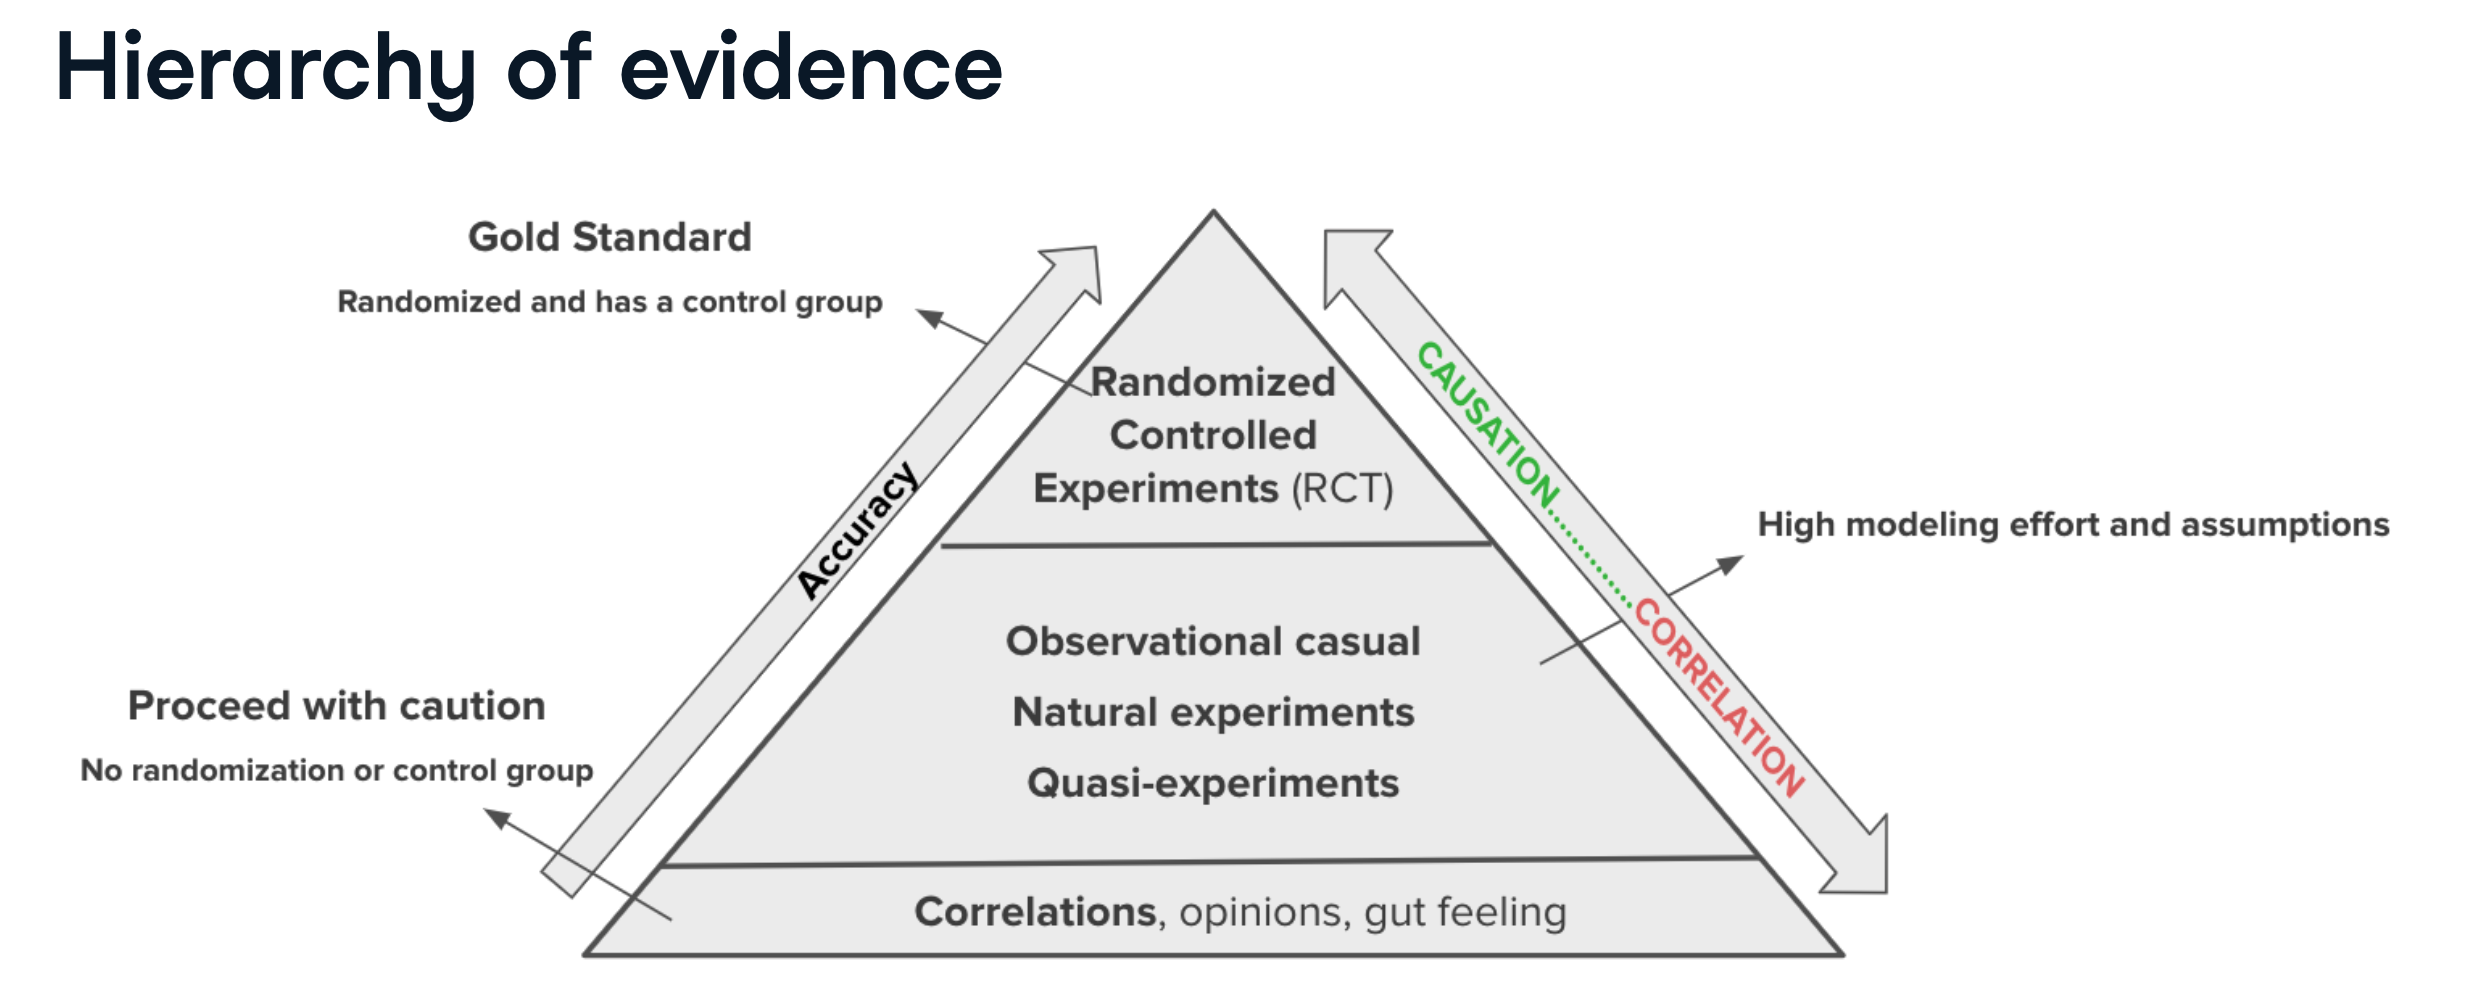

Even if the correlation between 2 variables is very high, it could be whats called **spurious correlation** that doesnt imply causation, but hides a 3rd element who's the real cause of the observation.

Correlation is still very useful, mainly when experiments are not an option.

## Pearson's correlation coefficient

Score that measures the strength of a linear relationship between two variables
- r>0: positive correlation
- r=0: neutral correlation
- r<0: negative correlation

$$
r = \frac{\sum (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum (X_i - \overline{X})^2 \sum (Y_i - \overline{Y})^2}}
$$

Where:
- $X_i$ and $Y_i$ are the individual data points for the variables $X$ and $Y$.
- $\overline{X}$ and $\overline{Y}$ are the mean values of $X$ and $Y$, respectively.

It asumes normality and linearity of the data.


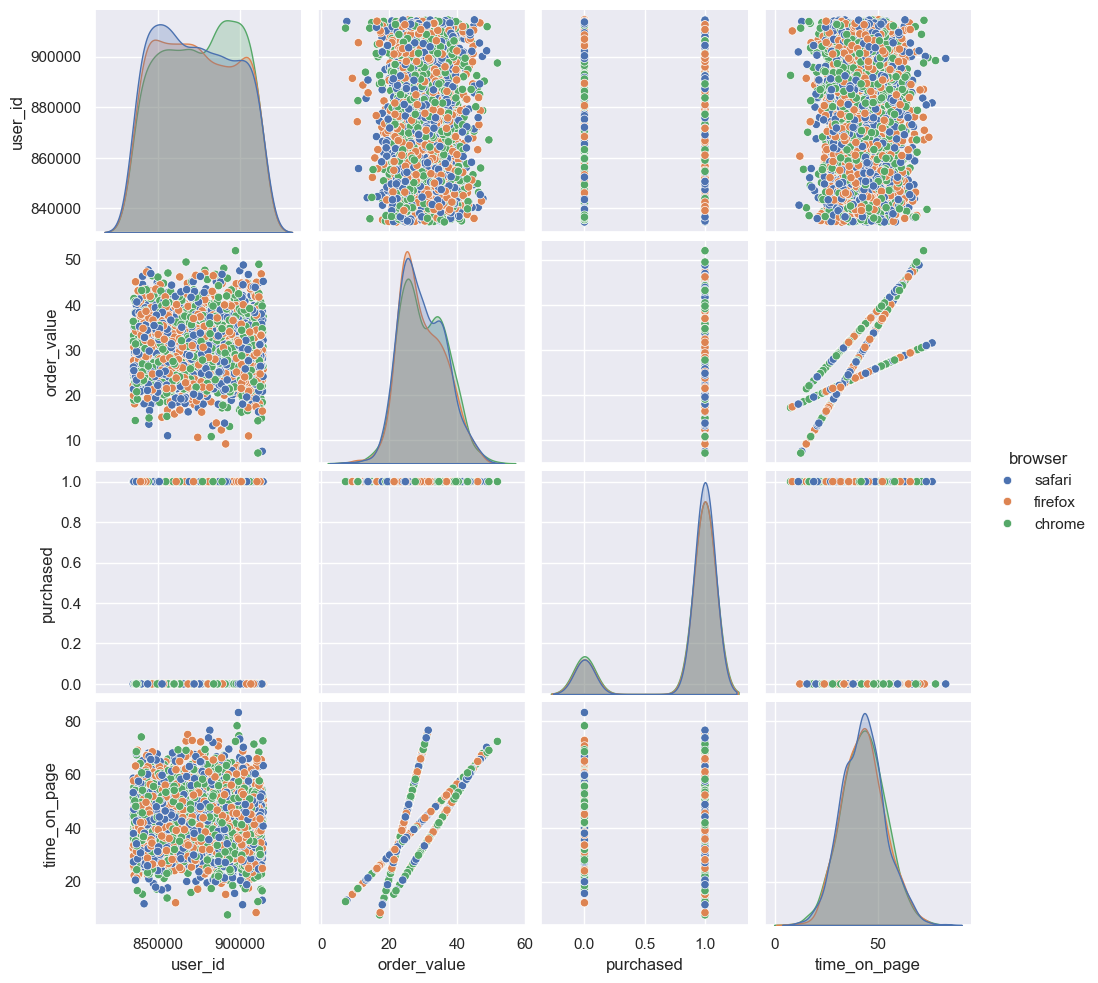

In [12]:
sns.pairplot(sample_df, hue='browser')

In [16]:
sample_df[['order_value', 'time_on_page']].corr()

,order_value,time_on_page
order_value,1.000000,0.654523
time_on_page,0.654523,1.000000


<Axes: >

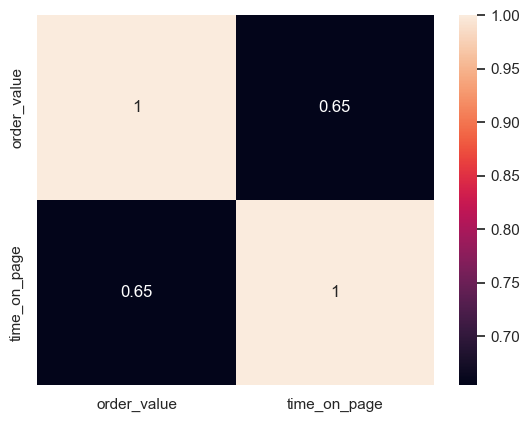

In [18]:
sns.heatmap(sample_df[['order_value', 'time_on_page']].corr(), annot=True)

# Metrics design and estimation

## Primary Metrics (goal/north-star)

These metrics are the ones that best describes the success of the business or mission

Examples:
- Signup rates
- Daily active users
- Average sales per user
- Average listening time per user

## Granular metrics 

These metrics go deeper and best explain users' behaviour and are more sensitive and actionable

## Instrumentation/guardail metrics 

# Quantitative categorization of metrics

- Means/Percentiles
- Proportions and rates
  - Signup rate
  - Page abandonment rate
- Ratio:
  - Click-through-rate
  - Revenue per session
- Metrics can be combined to form a more comprehensive success/failure criteria

# Metrics Requirements

- Stable/Robust against the unimportant differences
- Sensitive to the important changes
- Measurable within logging limitations
- Non-gameable


In [20]:
checkout.groupby('gender')['purchased'].mean()

gender
F    0.908056
M    0.780009
Name: purchased, dtype: float64

In [21]:
checkout[(checkout['browser'].isin(['chrome', 'safari']))].groupby('gender')['order_value'].mean()

gender
F    29.814161
M    30.383431
Name: order_value, dtype: float64

In [22]:
checkout.groupby('browser')[['order_value', 'purchased']].mean()

,order_value,purchased
browser,,
chrome,30.016625,0.839088
firefox,29.887491,0.851725
safari,30.119808,0.844337


In [23]:
# Calculate the mean order value for each group
checkout.groupby('checkout_page')['order_value'].mean()

checkout_page
A    24.956437
B    29.876202
C    34.917589
Name: order_value, dtype: float64

# Hypothesis formulations 

A **hypothesis** is:
- a statement explaining an event
- a starting point for further investigation
- an idea we want to test

A strong hypothesis:
- is testable, declarative, concise and logical
- enables systematic iteration
- is easier to generalize and confirm understanding
- results in actionable/focused recommendations

The general framing format for hypothesis: 
- Based on X, we believe that if we do Y
- Then Z will happen
- As measured by metric(s) M

Example of the **alternative hypothesis**: 
- Based on user experience research, we believe that if we update our checkout page design
- Then the percentage of purchasing customers will increase
- As measured by purchase rate

The **null hypothesis** is: the percentge of purchasing customers will not change

Lets test this hypothesis on checkout page 'A' and 'B'.

In [29]:
checkout.head()

,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,877621,A,29.410131,1.0,F,chrome,66.168628
1,876599,A,NaN,0.0,M,firefox,49.801887
2,905407,A,27.446845,1.0,M,chrome,56.744856
3,883562,A,30.602233,1.0,M,safari,71.890718
4,840542,A,29.668895,1.0,F,safari,67.410696


In [33]:
# Lets calculate sample statistics

# Number of users on each group 
n_A = checkout[checkout['checkout_page']=='A']['purchased'].count()
n_B = checkout[checkout['checkout_page']=='B']['purchased'].count()

print(f'n_A: {n_A}')
print(f'n_B: {n_B}')

n_A: 3000
n_B: 3000


In [37]:
# Number of users on each group 
p_A = checkout[checkout['checkout_page']=='A']['purchased'].mean()
p_B = checkout[checkout['checkout_page']=='B']['purchased'].mean()

print(f'p_A: {p_A:.3f}')
print(f'p_B: {p_B:.3f}')

p_A: 0.820
p_B: 0.847


The number of purchasers in **n** trials with purchasing probability **p** is Binomially distributed

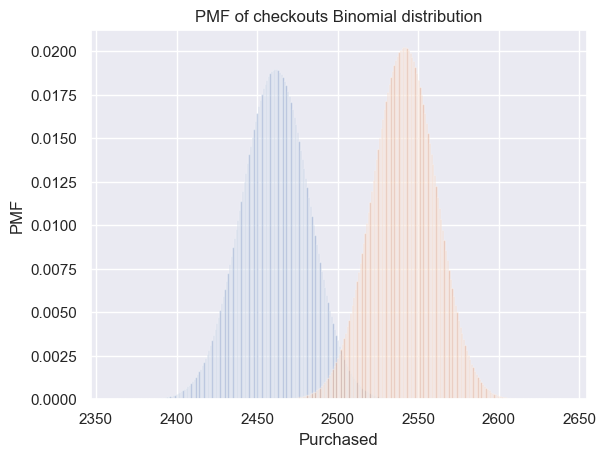

In [38]:
from scipy.stats import binom

x = np.arange(n_A*p_A - 100, n_B*p_B + 100)
binom_a = binom.pmf(x,n_A, p_A)
binom_b = binom.pmf(x,n_B, p_B)

plt.bar(x, binom_a, alpha=0.4, label='checkout A')
plt.bar(x, binom_b, alpha=0.4, label='checkout B')
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.title('PMF of checkouts Binomial distribution')
plt.show()


These distributions tell us the probabilities of, at most, a certain number of users purchasing in each group, but they don't tell us anything about the long-term purchase probability of the overall population if we were to present either checkout page to the users. To do so, we need to make inferences on the means using a normal distribution.

Recall that the **central limit theorem** states that as the sample size gets larger, the distribution of the sample means, p, will be normally distributed around the true population mean with a standard deviation equal to the standard error of the mean irrespective of the shape of the distribution of the data. We use this to approximate the true mean of the population from which the data was sampled using this formula where p and n are the mean proportion and the sample size respectively.

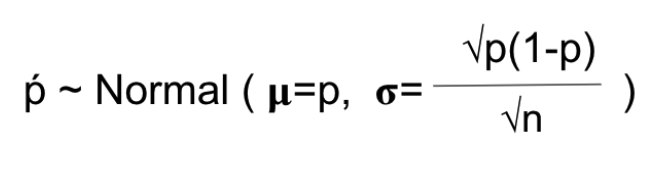



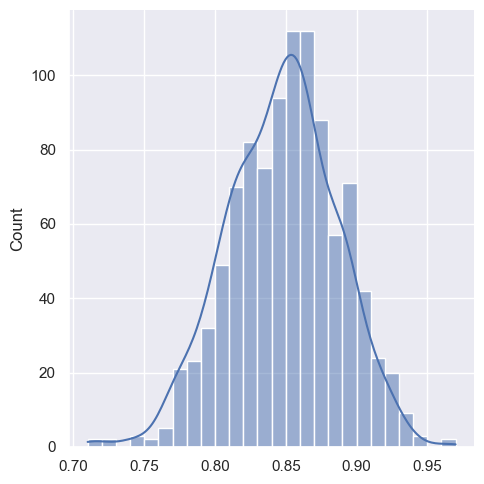

In [40]:
np.random.seed(47)
sampled_means = []
for i in range(1000):
    sample = checkout['purchased'].sample(100, replace=True)
    sample_mean = np.mean(sample)
    sampled_means.append(sample_mean) 

sns.displot(sampled_means, kde=True)
plt.show()

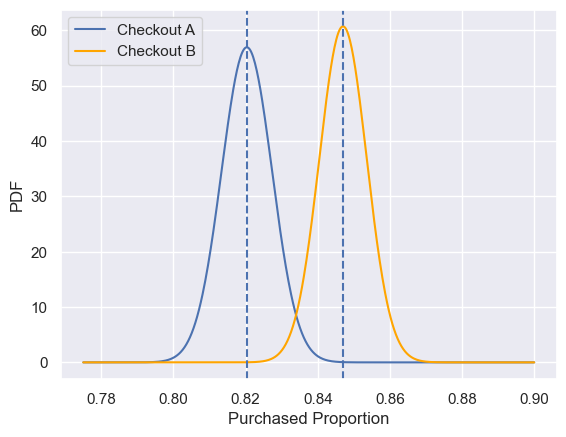

In [50]:
# Import norm from scipy library
from scipy.stats import norm

# Create x-axis range and normal distributions A and B
x = np. linspace(0.775, 0.9, 500)
norm_a = norm.pdf(x, p_A, np.sqrt(p_A*(1-p_A) / n_A))
norm_b = norm.pdf(x, p_B, np.sqrt(p_B*(1-p_B) / n_B))

# Plot normal distributions A and B
ax = sns.lineplot(x = x, y= norm_a, label='Checkout A') 
sns.lineplot(x = x, y = norm_b, color='orange', ax=ax, label= 'Checkout B')
ax.axvline(p_A, linestyle='--')
ax.axvline(p_B, linestyle='--')

plt.xlabel ('Purchased Proportion')
plt.ylabel('PDF')
plt.legend (loc="upper left")
plt.show()